In [ ]:
!pip show fastai

Name: fastai
Version: 2.0.16
Summary: fastai simplifies training fast and accurate neural nets using modern best practices
Home-page: https://github.com/fastai/fastai/tree/master/
Author: Jeremy Howard, Sylvain Gugger, and contributors
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: torchvision, pandas, fastcore, pyyaml, spacy, pip, scikit-learn, matplotlib, fastprogress, scipy, requests, torch, pillow, packaging
Required-by: 


In [1]:
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

     |████████████████████████████████| 194kB 4.8MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 


In [2]:
#from fastai.torch_basics import *
from fastai.vision.all import *

In [4]:
#download image
path = untar_data(URLs.MNIST_SAMPLE)

In [5]:
Path.BASE_PATH = path

In [6]:
path.ls()

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [ ]:
#looking at sub folder
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [ ]:
(path/'train'/'3').ls()

(#6131) [Path('train/3/29097.png'),Path('train/3/56995.png'),Path('train/3/26824.png'),Path('train/3/42391.png'),Path('train/3/8360.png'),Path('train/3/39127.png'),Path('train/3/16491.png'),Path('train/3/29121.png'),Path('train/3/30.png'),Path('train/3/13353.png')...]

In [6]:
# get path of all images
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [ ]:
#open a sample image
#from PIL import Image

seven = sevens[0]
im7 = Image.open(seven)
im7

In [ ]:
# converting to tensors
tensor_im7 = tensor(im7)
tensor_im7[3:10,3:10]

tensor([[  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,  21,  51, 213, 254, 252, 252],
        [ 21, 161, 250, 250, 252, 250, 250],
        [ 51, 250, 250, 250, 252, 189, 190]], dtype=torch.uint8)

In [ ]:
# get shape of tensor
tensor_im7.shape

torch.Size([28, 28])

In [ ]:
#get rank of tensor
tensor_im7.ndim

2

In [7]:
#convert all images to tensors
tensor_threes = [tensor(Image.open(img)) for img in threes]
tensor_sevens = [tensor(Image.open(img)) for img in sevens]
len(tensor_threes),len(tensor_sevens)

(6131, 6265)

In [ ]:
type(tensor_threes[1])

torch.Tensor

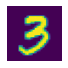

In [ ]:
#display image using fastai library
show_image(tensor_threes[3])

# operations on stacked tensors

In [8]:
stacked_threes = torch.stack(tensor_threes).float()/255
stacked_sevens = torch.stack(tensor_sevens).float()/255
stacked_threes.shape, stacked_sevens.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

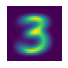

In [10]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

In [ ]:
mean3.shape

torch.Size([28, 28])

In [ ]:
mean3.max()

tensor(0.7795)

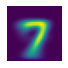

In [ ]:
mean7 = stacked_seven.mean(0)
show_image(mean7)

In [ ]:
"""
How can we determine its distance from our ideal 3? We can't just add up the differences between the pixels of this image and the ideal digit. Some differences will be positive while others will be negative, and these differences will cancel out, resulting in a situation where an image that is too dark in some places and too light in others might be shown as having zero total differences from the ideal. That would be misleading!

To avoid this, there are two main ways data scientists measure distance in this context:

Take the mean of the absolute value of differences (absolute value is the function that replaces negative values with positive values). This is called the mean absolute difference or L1 norm
Take the mean of the square of differences (which makes everything positive) and then take the square root (which undoes the squaring). This is called the root mean squared error (RMSE) or L2 norm.
"""

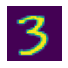

In [ ]:
im3 = stacked_threes[1]
show_image(im3)

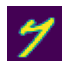

In [ ]:
im7 = stacked_seven[1]
show_image(im7)

In [ ]:
#taking absolute difference - L1 norm
l1_three = (mean3 -im3).abs().mean()
l2_three = ((mean3 -im3)**2).mean().sqrt()
l1_three,l2_three

(tensor(0.1114), tensor(0.2021))

In [ ]:
l1_seven = (mean7 -im7).abs().mean()
l2_seven = ((mean7 -im7)**2).mean().sqrt()
l1_seven,l2_seven

(tensor(0.1304), tensor(0.2585))

In [ ]:
#l1 refers to the standard mathematical jargon for mean absolute value 
l1_seven = F.l1_loss(im7,mean7) 

#mse stands for mean squared error
l2_seven = F.mse_loss(im7,mean7).sqrt()
l1_seven,l2_seven

"""
the difference between L1 norm and mean squared error (MSE) is that the latter 
will penalize bigger mistakes more heavily than the former (and be more lenient 
with small mistakes).
"""

(tensor(0.1304), tensor(0.2585))

# Tensor properties

In [ ]:
# create numpy array and tensor

a = [[1,2,3],[4,5,6]]
type(array(a)),type(tensor(a))

(numpy.ndarray, torch.Tensor)

In [ ]:
# PyTorch tensor cannot be jagged. It is always a regularly shaped multidimensional rectangular structure.
b = [[1,2],[4,5,6]]
tensor(b)

ValueError: ignored

In [ ]:
tns = tensor(a)
tns,tns.type()

(tensor([[1, 2, 3],
         [4, 5, 6]]), 'torch.LongTensor')

In [ ]:
tns*1.5,(tns*1.5).type()

(tensor([[1.5000, 3.0000, 4.5000],
         [6.0000, 7.5000, 9.0000]]), 'torch.FloatTensor')

# broadcasting

In [9]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [ ]:
#calculating L1 for single image
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(im3, mean3)

tensor(0.1114)

In [ ]:
#calculating L1 for all validation image
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1326, 0.1170, 0.1506,  ..., 0.1292, 0.1518, 0.1334]),
 torch.Size([1010]))

In [ ]:
mean3.shape,valid_3_tens.shape
"""
automatically expand the tensor with the smaller rank to have the same size 
as the one with the larger rank. Broadcasting is an important capability that 
makes tensor code much easier to write.
"""

(torch.Size([28, 28]), torch.Size([1010, 28, 28]))

In [ ]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)
is_3(im3), is_3(im3).float()

(tensor(True), tensor(1.))

In [ ]:
is_3(valid_3_tens)

tensor([ True,  True,  True,  ...,  True, False,  True])

In [ ]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [ ]:
#valid org
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

# SGD

## Calculating gradient

we use calculus as a performance optimization; it allows us to more quickly calculate whether our loss will go up or down when we adjust our parameters up or down. In other words, the gradients will tell us how much we have to change each weight to make our model better.


---

The key point about a derivative is this: for any function, such as the quadratic function we saw in the previous section, we can calculate its derivative. The derivative is another function. It calculates the change, rather than the value. For instance, the derivative of the quadratic function at the value 3 tells us how rapidly the function changes at the value 3. More specifically, you may recall that gradient is defined as rise/run, that is, the change in the value of the function, divided by the change in the value of the parameter. When we know how our function will change, then we know what we need to do to make it smaller. This is the key to machine learning: having a way to change the parameters of a function to make it smaller. Calculus provides us with a computational shortcut, the derivative, which lets us directly calculate the gradients of our functions.





In [6]:
def f(x): return x**2


requires_grad_ is the magical incantation we use to tell PyTorch that we want to calculate gradients with respect to that variable at that value. It is essentially tagging the variable, so PyTorch will remember to keep track of how to compute gradients of the other,

In [19]:
xt = tensor(3.0).requires_grad_()
xt

tensor(3., requires_grad=True)

In [21]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)


"backward" here refers to backpropagation, which is the name given to the process 
of calculating the derivative of each layer. 
This is called the "backward pass" of the network, as opposed to the "forward pass," 
which is where the activations are calculated. 
Life would probably be easier if backward was just called calculate_grad


In [ ]:
yt.backward()


In [24]:
#the derivative of x**2 is 2*x, and we have x=3, so the gradients should be 2*3=6
xt.grad

tensor(6.)

In [11]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [12]:
#add sum to our function so it can take a vector (i.e., a rank-1 tensor), and return a scalar (i.e., a rank-0 tensor):
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [13]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

## learning rate

Nearly all approaches start with the basic idea of multiplying the gradient by some small number, called the learning rate (LR). The learning rate is often a number between 0.001 and 0.1, although it could be anything. Often, people select a learning rate just by trying a few, and finding which results in the best model after training (we'll show you a better approach later in this book, called the learning rate finder).

## SGD

In [28]:
time = torch.arange(0,20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

tensor([68.1080, 56.4354, 43.3852, 34.2799, 18.0164, 21.5703,  9.9913,  7.4505,
         2.8640,  8.1814,  1.6086,  5.8018,  3.5109,  8.2339, 13.7919, 19.0234,
        32.0777, 42.7748, 54.9759, 66.7112])


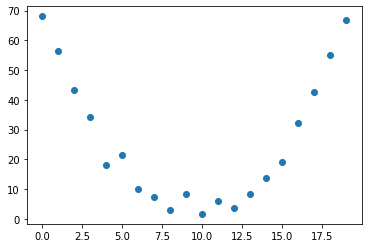

In [30]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
print(speed)
plt.scatter(time,speed);

In [31]:
#a*(time**2)+(b*time)+c
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [14]:
def mse(preds, targets): return ((preds-targets)**2).mean()

### Step 1: Initialize the parameters

In [33]:
params = torch.randn(3).requires_grad_()
params

tensor([ 1.0766, -0.2058,  0.2250], requires_grad=True)

In [34]:
orig_params = params.clone()

### Step 2: Calculate the predictions

In [37]:
preds = f(time, params)
preds

tensor([2.2502e-01, 1.0959e+00, 4.1200e+00, 9.2975e+00, 1.6628e+01, 2.6112e+01,
        3.7749e+01, 5.1540e+01, 6.7484e+01, 8.5581e+01, 1.0583e+02, 1.2824e+02,
        1.5279e+02, 1.7950e+02, 2.0837e+02, 2.3938e+02, 2.7255e+02, 3.0788e+02,
        3.4535e+02, 3.8498e+02], grad_fn=<AddBackward0>)

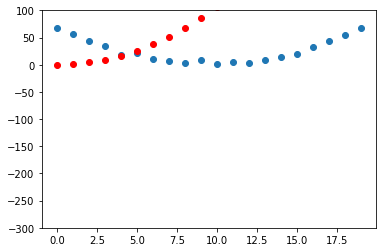

In [38]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)
show_preds(preds)

### Step 3: Calculate the loss

In [39]:
loss = mse(preds, speed)
loss

tensor(25017.5273, grad_fn=<MeanBackward0>)

### Step 4: Calculate the gradients

In [40]:
loss.backward()
params.grad

tensor([52376.8281,  3356.1655,   210.5916])

In [41]:
params.grad * 1e-5

tensor([0.5238, 0.0336, 0.0021])

In [42]:
params

tensor([ 1.0766, -0.2058,  0.2250], requires_grad=True)

In [43]:
params.grad.data

tensor([52376.8281,  3356.1655,   210.5916])

### Step 5: Step the weights.

Understanding this bit depends on remembering recent history. To calculate the gradients we call backward on the loss. But this loss was itself calculated by mse, which in turn took preds as an input, which was calculated using f taking as an input params, which was the object on which we originally called required_grads_—which is the original call that now allows us to call backward on loss. This chain of function calls represents the mathematical composition of functions, which enables PyTorch to use calculus's chain rule under the hood to calculate these gradients.

In [44]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [45]:
preds = f(time,params)
mse(preds, speed)

tensor(5252.8960, grad_fn=<MeanBackward0>)

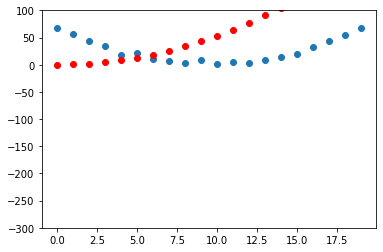

In [51]:
show_preds(preds)

In [47]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

## Step 6: Repeat the process

In [48]:
for i in range(10): apply_step(params)

5252.89599609375
1512.8199462890625
805.0798950195312
671.1505126953125
645.8035888671875
641.0040283203125
640.0924072265625
639.9166259765625
639.8800659179688
639.8698120117188


In [49]:
params = orig_params.detach().requires_grad_()

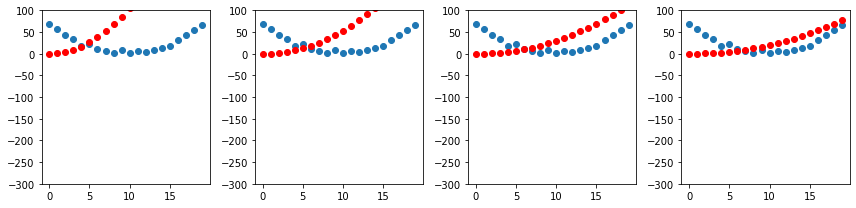

In [50]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

## Step 7: stop

We just decided to stop after 10 epochs arbitrarily. In practice, we would watch the training and validation losses and our metrics to decide when to stop, as we've discussed.

# MNIST Loss Function

We already have our dependent variables x—these are the images themselves. We'll concatenate them all into a single tensor, and also change them from a list of matrices (a rank-3 tensor) to a list of vectors (a rank-2 tensor). We can do this using view, which is a PyTorch method that changes the shape of a tensor without changing its contents. -1 is a special parameter to view that means "make this axis as big as necessary to fit all the data"

In [10]:
train_x = torch.cat([stacked_threes, stacked_sevens]) #.view(-1, 28*28)
train_x.shape

torch.Size([12396, 28, 28])

In [16]:
stacked_threes.shape,stacked_sevens.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

In [17]:
28*28

784

In [11]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_x.shape

torch.Size([12396, 784])

In [20]:
tensor([1]*3 + [0]*3)

tensor([1, 1, 1, 0, 0, 0])

In [12]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [22]:
train_y[len(threes)-3:len(threes)+3]

tensor([[1],
        [1],
        [1],
        [0],
        [0],
        [0]])

A Dataset in PyTorch is required to return a tuple of (x,y) when indexed. Python provides a zip function which, when combined with list, provides a simple way to get this functionality:

In [13]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

### create validation dataset

In [68]:
path.ls()

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [122]:
valid_threes = (path/'valid'/'3').ls().sorted()
valid_sevens = (path/'valid'/'7').ls().sorted()

valid_3 = [ tensor(Image.open(img)) for img in valid_threes]
valid_7 = [ tensor(Image.open(img)) for img in valid_sevens]
len(valid_3),len(valid_7)

(1010, 1028)

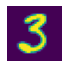

In [81]:
show_image(valid_3[0])

In [123]:
#stack
valid_3_tens = torch.stack(valid_3).float()/255
valid_7_tens = torch.stack(valid_3).float()/255
valid_3_tens.shape

torch.Size([1010, 28, 28])

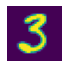

In [83]:
show_image(valid_3_tens[0])

In [124]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [14]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

## Intialize weight

In [15]:
def init_params(size, std=1.0): 
  return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28,1))
weights[:10]

tensor([[ 1.7218],
        [-1.0210],
        [ 0.2234],
        [ 1.8536],
        [-0.1646],
        [ 1.9253],
        [ 0.7031],
        [ 0.0124],
        [-1.9015],
        [ 0.5851]], grad_fn=<SliceBackward>)

In [33]:
weights.min(),weights.max()

(tensor(-2.8250, grad_fn=<MinBackward1>),
 tensor(2.7381, grad_fn=<MaxBackward1>))

The function weights*pixels won't be flexible enough—it is always equal to 0 when the pixels are equal to 0 (i.e., its intercept is 0)

In [16]:
bias = init_params(1)
bias

tensor([-0.1984], requires_grad=True)

In neural networks, the w in the equation y=w*x+b is called the weights, and the b is called the bias. Together, the weights and bias make up the parameters.

In [92]:
weights[:5]*train_x[:5].sum()

tensor([[-155.6042],
        [  56.0627],
        [ 502.3525],
        [-349.2169],
        [-291.0041]], grad_fn=<MulBackward0>)

In [97]:
train_x[0].shape,weights.T.shape

(torch.Size([784]), torch.Size([1, 784]))

In [35]:
#for 1 image calculate prediction
(train_x[0]*weights.T).sum() + bias

tensor([11.5996], grad_fn=<AddBackward0>)

In [17]:
#calculate for all images
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[-8.0960],
        [-8.7286],
        [-5.6578],
        ...,
        [ 2.0638],
        [-1.0291],
        [ 2.3038]], grad_fn=<AddBackward0>)

## accuracy

In [37]:
preds.min(),preds.max()

(tensor(-21.1527, grad_fn=<MinBackward1>),
 tensor(32.3938, grad_fn=<MaxBackward1>))

In [38]:
preds[:5],train_y[:5]

(tensor([[11.5996],
         [ 5.6828],
         [ 2.2132],
         [ 2.4509],
         [ 5.7904]], grad_fn=<SliceBackward>), tensor([[1],
         [1],
         [1],
         [1],
         [1]]))

In [41]:
len(preds)

12396

In [53]:
preds[len(threes)-3:len(threes)+3],train_y[len(threes)-3:len(threes)+3]

(tensor([[ 5.9445],
         [-4.1143],
         [-6.0111],
         [-3.7961],
         [-2.8690],
         [ 6.7557]], grad_fn=<SliceBackward>), tensor([[1],
         [1],
         [1],
         [0],
         [0],
         [0]]))

In [54]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [False],
        [ True]])

In [57]:
corrects.float().mean().item()

0.5354953408241272

In [56]:
weights[0] *= 1.0001
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.5354953408241272

A very small change in the value of a weight will often not actually change the accuracy at all. This means it is not useful to use accuracy as a loss function—if we do, most of the time our gradients will actually be 0, and the model will not be able to learn from that number.


---

we need a loss function which, when our weights result in slightly better predictions, gives us a slightly better loss. So what does a "slightly better prediction" look like, exactly? Well, in this case, it means that if the correct answer is a 3 the score is a little higher, or if the correct answer is a 7 the score is a little lower.

---



In [59]:
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])

torch.where(trgts==1, 1-prds, prds)


tensor([0.1000, 0.4000, 0.8000])

In [19]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()



In [ ]:
mnist_loss(prds,trgts)

For instance, if we change our prediction for the one "false" target from 0.2 to 0.8 the loss will go down, indicating that this is a better prediction:

In [61]:
mnist_loss(tensor([0.9, 0.4, 0.8]),trgts)

tensor(0.2333)

One problem with mnist_loss as currently defined is that it assumes that predictions are always between 0 and 1. We need to ensure, then, that this is actually the case

## sigmoid

In [20]:
def sigmoid(x): return 1/(1+torch.exp(-x))

def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

## mini batch

calculate the average loss for a few data items at a time. This is called a mini-batch. The number of data items in the mini-batch is called the batch size. A larger batch size means that you will get a more accurate and stable estimate of your dataset's gradients from the loss function, but it will take longer, and you will process fewer mini-batches per epoch.

Another good reason for using mini-batches rather than calculating the gradient on individual data items is that, in practice, we nearly always do our training on an accelerator such as a GPU. These accelerators only perform well if they have lots of work to do at a time, so it's helpful if we can give them lots of data items to work on. Using mini-batches is one of the best ways to do this. However, if you give them too much data to work on at once, they run out of memory—making GPUs happy is also tricky!

A DataLoader can take any Python collection and turn it into an iterator over many batches,

In [107]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 1,  0,  9,  2, 10]),
 tensor([ 4,  8, 13, 14, 11]),
 tensor([ 3,  7,  5, 12,  6])]

In [108]:
#A collection that contains tuples of independent and dependent variables is known in PyTorch as a Dataset.
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [111]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([ 1,  9, 25, 14,  0, 21]), ('b', 'j', 'z', 'o', 'a', 'v')),
 (tensor([ 8, 12, 22, 17,  7,  4]), ('i', 'm', 'w', 'r', 'h', 'e')),
 (tensor([15,  6,  5, 10,  3, 19]), ('p', 'g', 'f', 'k', 'd', 't')),
 (tensor([23,  2, 16, 20, 11, 18]), ('x', 'c', 'q', 'u', 'l', 's')),
 (tensor([13, 24]), ('n', 'y'))]

# Putting It All Together



```
for x,y in dl:
    pred = model(x)
    loss = loss_func(pred, y)
    loss.backward()
    parameters -= parameters.grad * lr
```



In [21]:
weights = init_params((28*28,1))
bias = init_params(1)


In [22]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [23]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [24]:
#Let's create a mini-batch of size 4 for testing:
batch = train_x[:4]
print(batch.shape)
preds = linear1(batch)
preds

torch.Size([4, 784])


tensor([[ 1.7568],
        [-1.7990],
        [ 2.4954],
        [ 3.3595]], grad_fn=<AddBackward0>)

In [129]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.9996, grad_fn=<MeanBackward0>)

In [130]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-5.3288e-05), tensor([-0.0004]))

In [25]:
#Put that all in a function
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [132]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0001), tensor([-0.0007]))

In [133]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0002), tensor([-0.0011]))

The gradients have changed! The reason for this is that loss.backward actually adds the gradients of loss to any gradients that are currently stored. So, we have to set the current gradients to 0 first:

In [134]:
weights.grad.zero_()
bias.grad.zero_();

In [135]:
#Inplace Operations: 
#Methods in PyTorch whose names end in an underscore modify their objects in place. 
#For instance, bias.zero_() sets all elements of the tensor bias to 0.

In [26]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [149]:
(preds>0.5).float() == train_y[:4]

tensor([[False],
        [False],
        [False],
        [False]])

In [27]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [139]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.)

In [28]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [29]:
validate_epoch(linear1)

0.5437

In [30]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)



0.6718

In [31]:

for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.8554 0.9169 0.936 0.9457 0.952 0.9545 0.9564 0.9599 0.9647 0.9657 0.9682 0.9687 0.9687 0.9696 0.9701 0.972 0.973 0.9735 0.974 0.9745 

# Creating an Optimizer

In [32]:
linear_model = nn.Linear(28*28,1)
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [33]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [34]:
opt = BasicOptim(linear_model.parameters(), lr)

In [35]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()
validate_epoch(linear_model)

0.55

In [36]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

train_model(linear_model, 20)

0.4932 0.8471 0.8388 0.9121 0.9331 0.9467 0.956 0.9629 0.9658 0.9672 0.9682 0.9712 0.9736 0.9746 0.976 0.9765 0.9775 0.978 0.9785 0.9785 

In [37]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.7793 0.8535 0.916 0.9345 0.9487 0.957 0.9633 0.9658 0.9682 0.9697 0.9721 0.9746 0.9751 0.976 0.976 0.978 0.978 0.9785 0.979 

In [38]:
dls = DataLoaders(dl, valid_dl)

In [39]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [40]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636427,0.503421,0.495584,00:00
1,0.491572,0.197161,0.828754,00:00
2,0.181612,0.172913,0.844455,00:00
3,0.080290,0.104867,0.914132,00:00
4,0.042949,0.076863,0.933759,00:00
5,0.028347,0.061623,0.947988,00:00
6,0.022323,0.052151,0.955348,00:00
7,0.019627,0.045868,0.963199,00:00
8,0.018245,0.041463,0.965653,00:00
9,0.017406,0.038223,0.966634,00:00


# Adding a Nonlinearity

In [42]:
def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    print("res",res)
    res = res@w2 + b2
    return res

simple_net is two linear classifiers with a max function between them.

Here, w1 and w2 are weight tensors, and b1 and b2 are bias tensors; that is, parameters that are initially randomly initialized,

In [41]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

The key point about this is that w1 has 30 output activations (which means that w2 must have 30 input activations, so they match). That means that the first layer can construct 30 different features, each representing some different mix of pixels. You can change that 30 to anything you like, to make the model more or less complex.

That little function res.max(tensor(0.0)) is called a rectified linear unit, also known as ReLU. We think we can all agree that rectified linear unit sounds pretty fancy and complicated... But actually, there's nothing more to it than res.max(tensor(0.0))—in other words, replace every negative number with a zero. This tiny function is also available in PyTorch as F.relu

In [43]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

The three lines of code that we have here are known as layers. The first and third are known as linear layers, and the second line of code is known variously as a nonlinearity, or activation function.

nn.Sequential creates a module that will call each of the listed layers or functions in turn.

nn.ReLU is a PyTorch module that does exactly the same thing as the F.relu function. Most functions that can appear in a model also have identical forms that are modules. Generally, it's just a case of replacing F with nn and changing the capitalization. When using nn.Sequential, PyTorch requires us to use the module version. Since modules are classes, we have to instantiate them, which is why you see nn.ReLU() in this example.

Because nn.Sequential is a module, we can get its parameters, which will return a list of all the parameters of all the modules it contains. 

In [44]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [45]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.290967,0.410132,0.505888,00:00
1,0.138313,0.218649,0.817468,00:00
2,0.077855,0.112142,0.916585,00:00
3,0.051977,0.076597,0.942100,00:00
4,0.039842,0.060207,0.955839,00:00
5,0.033566,0.050945,0.964181,00:00
6,0.029910,0.045073,0.965162,00:00
7,0.027503,0.041032,0.966634,00:00
8,0.025754,0.038077,0.968106,00:00
9,0.024393,0.035811,0.969578,00:00


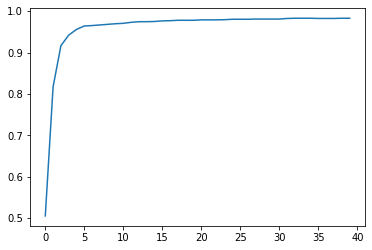

In [46]:
plt.plot(L(learn.recorder.values).itemgot(2));

the training process is recorded in learn.recorder, with the table of output stored in the values

In [47]:
#final accuracy
learn.recorder.values[-1][2]

0.982826292514801

In [48]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.103937,0.019465,0.994603,03:27


# Playing with tensor operation

In [ ]:
from fastai.vision import *

In [ ]:
!wget -O test.png "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQo80YSkyzYR72qE2m5n0YRfXZTox7X2PO0gg&usqp=CAU"

--2020-10-11 16:57:50--  https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQo80YSkyzYR72qE2m5n0YRfXZTox7X2PO0gg&usqp=CAU
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 172.217.204.138, 172.217.204.101, 172.217.204.102, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|172.217.204.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1994 (1.9K) [image/png]
Saving to: ‘test.png’

test.png            100%[===================>]   1.95K  --.-KB/s    in 0s      

2020-10-11 16:57:50 (22.1 MB/s) - ‘test.png’ saved [1994/1994]



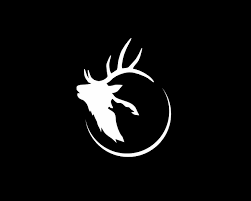

In [ ]:
#open the image
from PIL import Image
path = Path('/content/test.png')
img = Image.open(path)
img

In [ ]:
array(img)[:3,:3]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [ ]:
#casting image as tensor 
tensorImg = tensor(array(img))
tensorImg[85:125,110:150]

tensor([[37, 39, 41,  ...,  0,  0,  0],
        [ 1,  1,  1,  ...,  0,  0,  0],
        [ 1,  1,  1,  ...,  0,  0,  0],
        ...,
        [ 1,  1,  1,  ...,  0,  0,  0],
        [ 1,  1,  1,  ...,  0,  0,  0],
        [ 1,  1,  1,  ...,  0,  0,  0]], dtype=torch.uint8)

In [ ]:
tensorImg.shape

torch.Size([201, 251])

In [ ]:
tensorImg.unique()

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43], dtype=torch.uint8)

In [ ]:
#not working
df = pd.DataFrame(tensorImg[85:125,110:150])
df.style.set_properties(**{'font-size':'2pt'}).background_gradient('greys',axis=1)

In [ ]:
tensorImg.ndim

2

In [ ]:
tensorImg.shape

torch.Size([201, 251])

In [ ]:
img = tensorImg.unsqueeze(0)
img.shape

torch.Size([1, 201, 251])

In [ ]:
img.ndim

3

In [ ]:
img.unique()

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43], dtype=torch.uint8)

In [ ]:
#converting values in range of 0 -255
img = (((img.float() - img.min()) * (255 - 0)) / (img.max() - img.min())) 
img.unique()

tensor([  0.0000,   5.9302,  11.8605,  17.7907,  23.7209,  29.6512,  35.5814,
         41.5116,  47.4419,  53.3721,  59.3023,  65.2326,  71.1628,  77.0930,
         83.0233,  88.9535,  94.8837, 100.8140, 106.7442, 112.6744, 118.6047,
        124.5349, 130.4651, 136.3954, 142.3256, 148.2558, 154.1861, 160.1163,
        166.0465, 171.9767, 177.9070, 183.8372, 189.7674, 195.6977, 201.6279,
        207.5581, 213.4884, 219.4186, 225.3488, 231.2791, 237.2093, 243.1395,
        249.0698, 255.0000])

In [ ]:
temp = img.float()/255
temp.unique()

tensor([0.0000, 0.0233, 0.0465, 0.0698, 0.0930, 0.1163, 0.1395, 0.1628, 0.1860,
        0.2093, 0.2326, 0.2558, 0.2791, 0.3023, 0.3256, 0.3488, 0.3721, 0.3953,
        0.4186, 0.4419, 0.4651, 0.4884, 0.5116, 0.5349, 0.5581, 0.5814, 0.6047,
        0.6279, 0.6512, 0.6744, 0.6977, 0.7209, 0.7442, 0.7674, 0.7907, 0.8140,
        0.8372, 0.8605, 0.8837, 0.9070, 0.9302, 0.9535, 0.9767, 1.0000])